In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# import warnings
# warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from IPython.display import display, HTML

%matplotlib inline

### Data Ingestion + Cleaning

Source data: FARS [Fatality Analysis Reporting System ](https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812602)

Data sets come seperated like relational databases.  Importing data sets and merging is the first step.

In [2]:
accidents_raw = pd.read_csv('FARS2017NationalCSV/accident.csv')
impact_codes = pd.read_csv('Helper_Files/impact_codes.csv')
states = pd.read_csv('Helper_Files/states.csv')

#### Merge Checker

This is a useful function that helps check dataframe merges.  This shows when values are lost when merging, helpful when joining unfamiliar databases.  

In [3]:
def merge_check(df, drop_merge_col=True):
    display(df['_merge'].value_counts())
    
    if drop_merge_col:
        df.drop(columns=['_merge'],inplace=True) 
    
    return df

In [4]:
accidents = accidents_raw.merge(states, 
                            how='left', 
                            left_on='STATE', 
                            right_on='Code',
                            indicator=True)

accidents = merge_check(accidents, 
                        drop_merge_col=True)
        
accidents.head()

both          34247
left_only         0
right_only        0
Name: _merge, dtype: int64

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,NHS,RUR_URB,FUNC_SYS,RD_OWNER,ROUTE,TWAY_ID,TWAY_ID2,MILEPT,LATITUDE,LONGITUD,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,WEATHER,SCH_BUS,RAIL,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR,Code,State
0,1,10001,1,1,0,0,0,1,1,73,330,19,2,2017,1,23,35,1,2,1,1,1,I-459,NaN,10,33.335661,-87.007094,0,38,0,0,1,1,0,3,2,1,0,1,0,725409J,99,99,99,99,88,88,0,0,0,1,0,1,Alabama
1,1,10002,1,1,0,0,0,1,1,89,1730,14,2,2017,3,14,59,1,2,1,1,1,I-565,NaN,70,34.661528,-86.786853,0,1,0,0,1,1,0,3,1,1,0,1,0,0,15,0,15,9,88,88,0,0,0,1,0,1,Alabama
2,1,10003,3,3,0,0,0,3,3,101,2130,31,1,2017,3,20,31,1,2,1,1,1,I-85,CHANTILLY PKWY,100,32.366519,-86.145281,0,12,1,0,1,1,0,1,2,1,0,1,0,0,99,99,99,99,88,88,0,0,0,1,0,1,Alabama
3,1,10004,1,1,0,0,0,1,1,73,350,1,1,2017,1,16,55,0,2,4,4,6,20TH ST ENSLEY,AVE I,0,33.510175,-86.894003,0,30,0,0,3,2,0,4,3,2,0,2,0,0,99,99,16,58,88,88,20,0,0,1,0,1,Alabama
4,1,10005,1,1,0,0,0,2,2,13,0,1,1,2017,1,20,0,1,1,1,1,1,I-65,NaN,1383,31.947236,-86.556778,0,35,0,0,1,1,0,3,2,2,0,2,0,0,20,17,20,31,21,11,0,0,0,1,0,1,Alabama


In [5]:
accidents = accidents.merge(impact_codes, 
                            how='left', 
                            left_on='HARM_EV', 
                            right_on='Code',
                            indicator=True)


accidents = merge_check(accidents, 
                       drop_merge_col=True)

accidents.drop(columns=['Code_y'], inplace=True)

accidents.head()

both          34247
left_only         0
right_only        0
Name: _merge, dtype: int64

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,NHS,RUR_URB,FUNC_SYS,RD_OWNER,ROUTE,TWAY_ID,TWAY_ID2,MILEPT,LATITUDE,LONGITUD,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,WEATHER,SCH_BUS,RAIL,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR,Code_x,State,Effect
0,1,10001,1,1,0,0,0,1,1,73,330,19,2,2017,1,23,35,1,2,1,1,1,I-459,NaN,10,33.335661,-87.007094,0,38,0,0,1,1,0,3,2,1,0,1,0,725409J,99,99,99,99,88,88,0,0,0,1,0,1,Alabama,Fence
1,1,10002,1,1,0,0,0,1,1,89,1730,14,2,2017,3,14,59,1,2,1,1,1,I-565,NaN,70,34.661528,-86.786853,0,1,0,0,1,1,0,3,1,1,0,1,0,0,15,0,15,9,88,88,0,0,0,1,0,1,Alabama,Rollover/Overturn
2,1,10003,3,3,0,0,0,3,3,101,2130,31,1,2017,3,20,31,1,2,1,1,1,I-85,CHANTILLY PKWY,100,32.366519,-86.145281,0,12,1,0,1,1,0,1,2,1,0,1,0,0,99,99,99,99,88,88,0,0,0,1,0,1,Alabama,Motor Vehicle In-Transport
3,1,10004,1,1,0,0,0,1,1,73,350,1,1,2017,1,16,55,0,2,4,4,6,20TH ST ENSLEY,AVE I,0,33.510175,-86.894003,0,30,0,0,3,2,0,4,3,2,0,2,0,0,99,99,16,58,88,88,20,0,0,1,0,1,Alabama,Utility Pole/Light Support
4,1,10005,1,1,0,0,0,2,2,13,0,1,1,2017,1,20,0,1,1,1,1,1,I-65,NaN,1383,31.947236,-86.556778,0,35,0,0,1,1,0,3,2,2,0,2,0,0,20,17,20,31,21,11,0,0,0,1,0,1,Alabama,Embankment


#### Basic Feature Engineering

##### Creating Dates and Day of Week Values

In [6]:
accidents['date'] = pd.to_datetime(accidents['YEAR'].astype(str) + '-' + accidents['MONTH'].astype(str) + '-' + accidents['DAY'].astype(str))

# Order by date to calculate cumulative values
accidents['day_of_week'] = accidents['date'].dt.day_name()
accidents = accidents.sort_values(by=['date'])
accidents['case_count'] = np.arange(len(accidents))

wi_accidents = accidents[ accidents['State'] == 'Wisconsin']

##### Plotting Accidents by Day

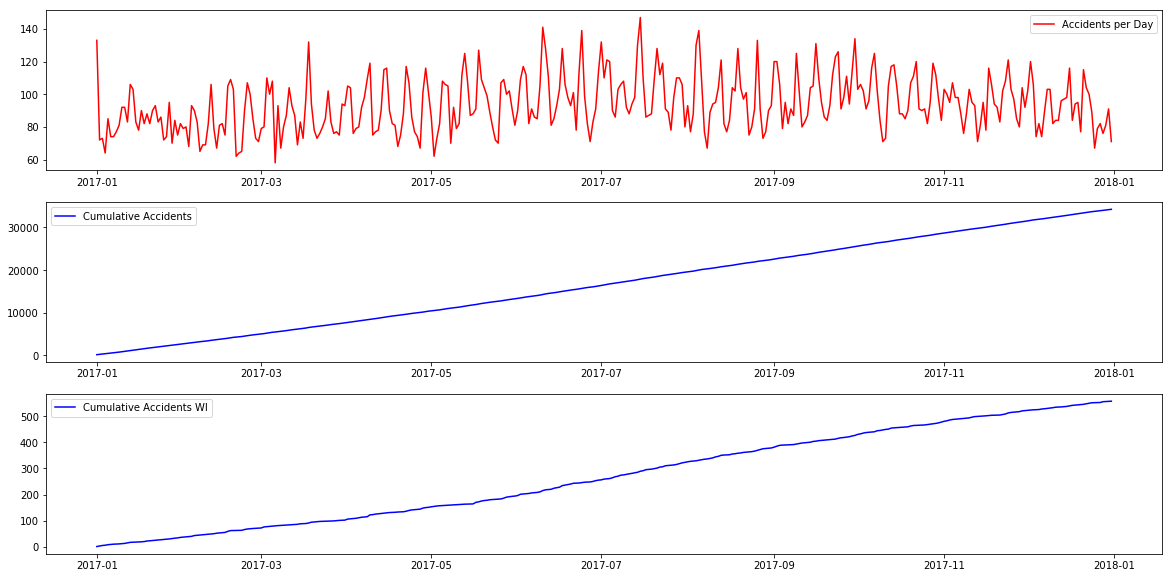

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

plt.subplot(3,1,1)
plt.plot(accidents.groupby(['date'])['ST_CASE'].count(), 
         'r', 
         label='Accidents per Day')

plt.legend()

plt.subplot(3,1,2)
plt.plot(accidents.groupby(['date'])['case_count'].count().cumsum(), 
         'b', 
         label='Cumulative Accidents')

plt.legend()

plt.subplot(3,1,3)
plt.plot(wi_accidents.groupby(['date'])['case_count'].count().cumsum(), 
         'b', 
         label='Cumulative Accidents WI')

plt.legend()

In [8]:
accidents['day_of_week'].value_counts(dropna=False, normalize=True)

Saturday     0.171489
Sunday       0.156510
Friday       0.156452
Thursday     0.134932
Monday       0.127719
Tuesday      0.126931
Wednesday    0.125967
Name: day_of_week, dtype: float64

At the level of a national trend, there appear to be more accidents Friday to Sunday, peaking on Saturday. Looking day over day, the number of accidents do not appear to increase meaningfully on any particular day.  The rate of accidents appears constant. 

#### Type of Accident 

In [9]:
quantity_of_fatals = accidents.groupby('Effect')['FATALS'].sum().sort_values(ascending=False).reset_index()
quantity_of_fatals['perc_total'] = round(quantity_of_fatals['FATALS'] / accidents['FATALS'].sum(), 3) 

quantity_of_fatals.head(15)

,Effect,FATALS,perc_total
0,Motor Vehicle In-Transport,15276,0.411
1,Pedestrian,5609,0.151
2,Rollover/Overturn,2924,0.079
3,Tree (Standing Only),2596,0.070
4,Curb,1188,0.032
5,Embankment,926,0.025
6,Ditch,925,0.025
7,Guardrail Face,801,0.022
8,Pedalcyclist,778,0.021
9,Utility Pole/Light Support,714,0.019


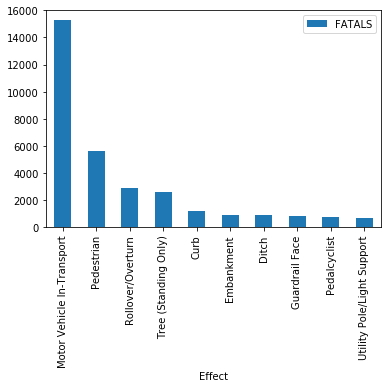

In [10]:
quantity_of_fatals[['FATALS', 'Effect']].head(10).plot(kind='bar',  x='Effect')

These aggregations reveal the kind of collissions that prove most lethal.  Not surprisingly, motor vehicles hitting other in-transit motor vehicles is the most common source of motor vehicle fatalities while vehicles striking pedestriants is the second most common cause. 

Interestingly, the number of cyclists killed by being stuck by a vehicle seems low considering the relative vulnerability of cyclists.  Contrast this to the number of casualties associated with motorcycles (later in the analysis).    

#### State Population Size Data

Getting a better sense for the "rate" of accidents (per 100K people, for example) allows us to account for states with different populations.  Larger states would be expected to have more accidents, but are there more accidents per 100K people? 

In [11]:
state_population = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")
state_population = state_population[0]

state_population = state_population.iloc[:,2:4]

state_population.rename(columns={state_population.columns[-1]:'Population'}, inplace=True)


state_fatalities = accidents.groupby('State')['FATALS'].sum().sort_values(ascending=False)

state_fatalities = state_fatalities.reset_index(name="Fatals")

state_fatalities = state_fatalities.merge(state_population, 
                                          how='left', 
                                          left_on='State', 
                                          right_on='State',
                                          indicator=True)


state_fatalities = merge_check(state_fatalities)

state_fatalities.head()

both          51
left_only      0
right_only     0
Name: _merge, dtype: int64

,State,Fatals,Population
0,Texas,3722,28995881
1,California,3602,39512223
2,Florida,3112,21477737
3,Georgia,1540,10617423
4,North Carolina,1412,10488084


In [12]:
state_fatalities[["Fatals", "Population"]] = state_fatalities[["Fatals", "Population"]].apply(pd.to_numeric)

state_fatalities['Casualties_per_100K_Population'] = ( state_fatalities['Fatals'] / state_fatalities['Population']) * 100000

state_fatalities.head(10).sort_values('Casualties_per_100K_Population', ascending=False)

,State,Fatals,Population,Casualties_per_100K_Population
8,Tennessee,1040,6833174,15.219867
3,Georgia,1540,10617423,14.504461
2,Florida,3112,21477737,14.489422
4,North Carolina,1412,10488084,13.462898
0,Texas,3722,28995881,12.836306
9,Michigan,1030,9986857,10.313555
5,Ohio,1179,11689100,10.086320
1,California,3602,39512223,9.116166
6,Pennsylvania,1137,12801989,8.881432
7,Illinois,1097,12671821,8.657004


Before we condemn the states with high casualty rates per 100K, consider the effect of large population centers on this metric.  Highly urban areas with dense populations (NY, as an example) are less likely to respond to this metric due to the fact that many people in those environments do not drive or own vehicles. 

More on this later in the analysis in "Casualties per 100K Vehicles"

### Calculations and Metric Generation

In [13]:
accidents['fatal_event'] = np.where(accidents['FATALS'] > 0, 1, 0)    
accidents['fatal_event_intoxicated'] = np.where(accidents['DRUNK_DR'] > 0, 1, 0)       
    
display(pd.crosstab(index=accidents['DRUNK_DR'], columns=accidents['fatal_event_intoxicated']))

fatal_event_intoxicated,0,1
DRUNK_DR,,
0,25478,0
1,0,8513
2,0,249
3,0,7


A basic classification is used here: if any number of drunk drivers are present in an accident, the event is classified as "fatal_event_intoxicated".

The distribution of casualities given a fatal event occurs are visible below.  Note the power-distribution, most events involve a single death.  Note the total human cost is not captured here since we do not have data around injuries. 

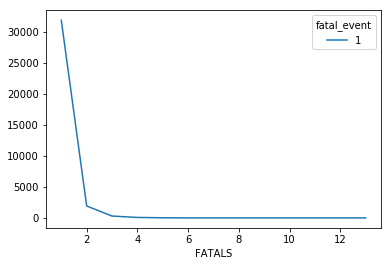

In [14]:
display(pd.crosstab(index=accidents['FATALS'], columns=accidents['fatal_event']).plot())

### State Performance Relative to Alcohol Related Casualties

* Fatal_Events_DUI_Related_perc - Percentage of accidents that involve an intoxicated driver, given a fatal accident occured
* National_DUI_perc - A state's percentage of the total number of DUIs nationwide. 

In [15]:
# "fatal_event" and "fatal_even_intoxicated" are a binary values, indicating the presence or absence of a death
state_dui = accidents.groupby('State').agg({'fatal_event':'sum', 'fatal_event_intoxicated':'sum'}).sort_values(by='fatal_event', ascending=False)

state_dui = state_dui.reset_index()

state_dui['Fatal_Events_DUI_Related_perc'] = (state_dui['fatal_event_intoxicated'] / state_dui['fatal_event'])

state_dui['National_DUI_perc'] = state_dui['fatal_event_intoxicated'] / state_dui['fatal_event_intoxicated'].sum() 

In [16]:
state_dui.head(5).sort_values(by='Fatal_Events_DUI_Related_perc', ascending=False)

,State,fatal_event,fatal_event_intoxicated,Fatal_Events_DUI_Related_perc,National_DUI_perc
0,Texas,3343,857,0.256357,0.097731
4,North Carolina,1306,333,0.254977,0.037975
1,California,3304,823,0.249092,0.093853
2,Florida,2922,607,0.207734,0.069221
3,Georgia,1440,295,0.204861,0.033641


Note the large percentage of national DUI fatalties from Texas, California and Florida.  The percentages from these states are higher then other states, so this looks like a promising place to start.  

Before drawing any conclusions we should look for ways to falsity this observation.  Percentage changes can distort the view towards the absolute value of a change, so we need to be careful to make sure we are not condemning these states unnecessarily.  

It could be they have a larger percentage of the country's DUIs because they contain a larger percentage of the county's citizens.

In [17]:
state_dui.head(5).sort_values(by='National_DUI_perc', ascending=False)

,State,fatal_event,fatal_event_intoxicated,Fatal_Events_DUI_Related_perc,National_DUI_perc
0,Texas,3343,857,0.256357,0.097731
1,California,3304,823,0.249092,0.093853
2,Florida,2922,607,0.207734,0.069221
4,North Carolina,1306,333,0.254977,0.037975
3,Georgia,1440,295,0.204861,0.033641


In [18]:
state_fatalities['perc_population'] = state_fatalities['Population'] / state_fatalities['Population'].sum()

In [19]:
state_dui = state_dui.merge(state_fatalities[['State', 'perc_population']], 
               how='left',
               left_on='State',
               right_on='State',
               indicator=True)

state_dui = merge_check(state_dui)

both          51
left_only      0
right_only     0
Name: _merge, dtype: int64

In [20]:
state_dui.head()

,State,fatal_event,fatal_event_intoxicated,Fatal_Events_DUI_Related_perc,National_DUI_perc,perc_population
0,Texas,3343,857,0.256357,0.097731,0.088321
1,California,3304,823,0.249092,0.093853,0.120354
2,Florida,2922,607,0.207734,0.069221,0.065421
3,Georgia,1440,295,0.204861,0.033641,0.032341
4,North Carolina,1306,333,0.254977,0.037975,0.031947


Note that large percentages of DUIs mostly follow the population trends.  This is intuitive: larger states would be expected to represent a larger percentage of crimes of all kinds. 

In [21]:
state_dui['DUI_population_variance'] = state_dui['National_DUI_perc'] - state_dui['perc_population']
state_dui = state_dui.sort_values(by='DUI_population_variance')
state_dui.head()

,State,fatal_event,fatal_event_intoxicated,Fatal_Events_DUI_Related_perc,National_DUI_perc,perc_population,DUI_population_variance
10,New York,933,156,0.167203,0.017790,0.059255,-0.041465
1,California,3304,823,0.249092,0.093853,0.120354,-0.026500
22,New Jersey,591,117,0.197970,0.013342,0.027055,-0.013713
6,Pennsylvania,1083,252,0.232687,0.028738,0.038995,-0.010257
31,Massachusetts,336,104,0.309524,0.011860,0.021168,-0.009308


In [22]:
state_dui.tail()

,State,fatal_event,fatal_event_intoxicated,Fatal_Events_DUI_Related_perc,National_DUI_perc,perc_population,DUI_population_variance
14,Missouri,863,230,0.266512,0.026229,0.018695,0.007534
0,Texas,3343,857,0.256357,0.097731,0.088321,0.009409
13,Alabama,864,214,0.247685,0.024404,0.014935,0.009469
18,Louisiana,696,234,0.336207,0.026685,0.014160,0.012525
11,South Carolina,924,304,0.329004,0.034668,0.015683,0.018985


After sorting by the variance between population size and DUI percentage an interesting trend emerges.  Many southern/rural states appear to have higher than expected DUI percentages after accounting for their population size.

In [23]:
state_dui['fatal_event_intoxicated'].sum() / state_dui['fatal_event'].sum()

0.2560516249598505

Observation - about 26% of fatal accidents in the United States in 2017 involved alcohol.

### Vehicle Registrations Data (Number of Vehicles)

In [24]:
registrations = pd.read_csv('Helper_Files/vehicle_registrations.csv')
registrations.head(5)

,State,Registered Vehicles
0,Alabama,"5,468,301"
1,Alaska,"794,614"
2,Arizona,"5,786,891"
3,Arkansas,"2,808,138"
4,California,"30,221,033"


In [25]:
registrations['State'] = registrations['State'].str.replace('[^A-Za-z\s]+', '', regex=True)
registrations['State'] = registrations['State'].str.replace('Dist of Col', 'District of Columbia')

registrations['qty_registered_vehicles'] = registrations['Registered Vehicles'].str.replace(',', '').astype(float)
registrations['State'] = registrations['State'].str.strip()
registrations.drop(columns=['Registered Vehicles'], inplace=True) 

state_level_data = state_dui.merge(state_fatalities, 
                                   how='left', 
                                   left_on='State', 
                                   right_on='State',
                                   indicator=True)

state_level_data = merge_check(state_level_data)

state_level_data['fatalities_per_accident'] = state_level_data['Fatals'] / state_level_data['fatal_event']

state_level_final = state_level_data.merge(registrations, 
                                           how='left', 
                                           left_on='State', 
                                           right_on='State',
                                           indicator=True)

state_level_final = merge_check(state_level_final)

state_level_final.head()

# state_level_final.iloc[ state_level_final[ state_level_final.isnull().sum(axis=1) >= 1 ].index ]
# missing_vals = state_level_final.iloc[ state_level_final[ state_level_final.isna().any(axis=1) ].index ]

both          51
left_only      0
right_only     0
Name: _merge, dtype: int64

both          51
left_only      0
right_only     0
Name: _merge, dtype: int64

,State,fatal_event,fatal_event_intoxicated,Fatal_Events_DUI_Related_perc,National_DUI_perc,perc_population_x,DUI_population_variance,Fatals,Population,Casualties_per_100K_Population,perc_population_y,fatalities_per_accident,qty_registered_vehicles
0,New York,933,156,0.167203,0.017790,0.059255,-0.041465,999,19453561,5.135307,0.059255,1.070740,11122392.0
1,California,3304,823,0.249092,0.093853,0.120354,-0.026500,3602,39512223,9.116166,0.120354,1.090194,30221033.0
2,New Jersey,591,117,0.197970,0.013342,0.027055,-0.013713,624,8882190,7.025294,0.027055,1.055838,5940997.0
3,Pennsylvania,1083,252,0.232687,0.028738,0.038995,-0.010257,1137,12801989,8.881432,0.038995,1.049861,10748822.0
4,Massachusetts,336,104,0.309524,0.011860,0.021168,-0.009308,350,6949503,5.036331,0.021168,1.041667,5069559.0


Note the output of the merge_check function above.  This function allows us to see when values from a merge do not line up and can help locate discrepencies.  The raw registration data lists "Connecticut" as "Connecticut (2)" for some reason and 'District of Columbia' as 'Dist of Col'.  Renaming these values allows us to avoid dropping values that appear as incomplete (i.e. fail to merge with the dataset we are building out) when they are infact just mislabeled. 


#### Creating a "Rate" Value - Casualities per 100K Vehicles

In [26]:
state_level_final['Casualties_per_100K_Vehicles'] = ( state_level_final['Fatals'] / state_level_final['qty_registered_vehicles']) * 100000

In [27]:
state_level_final.head(5)

,State,fatal_event,fatal_event_intoxicated,Fatal_Events_DUI_Related_perc,National_DUI_perc,perc_population_x,DUI_population_variance,Fatals,Population,Casualties_per_100K_Population,perc_population_y,fatalities_per_accident,qty_registered_vehicles,Casualties_per_100K_Vehicles
0,New York,933,156,0.167203,0.017790,0.059255,-0.041465,999,19453561,5.135307,0.059255,1.070740,11122392.0,8.981881
1,California,3304,823,0.249092,0.093853,0.120354,-0.026500,3602,39512223,9.116166,0.120354,1.090194,30221033.0,11.918851
2,New Jersey,591,117,0.197970,0.013342,0.027055,-0.013713,624,8882190,7.025294,0.027055,1.055838,5940997.0,10.503288
3,Pennsylvania,1083,252,0.232687,0.028738,0.038995,-0.010257,1137,12801989,8.881432,0.038995,1.049861,10748822.0,10.577903
4,Massachusetts,336,104,0.309524,0.011860,0.021168,-0.009308,350,6949503,5.036331,0.021168,1.041667,5069559.0,6.903954


### Cross Plot Casualties per 100K Population / Casualties per 100K Vehicles

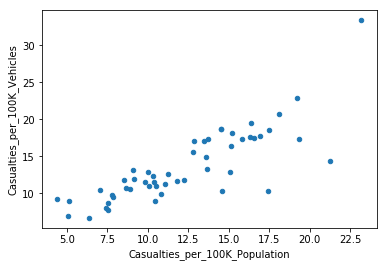

In [28]:
state_level_final.plot(kind='scatter',  
                       y='Casualties_per_100K_Vehicles', 
                       x='Casualties_per_100K_Population')

### 2 x 2 Casualties per 100K Vehicles / 100K People

This scatter plot helps reduce ambiguity around the impact of extra factors related to accident rates.  By accounting for population and the number of drivers, two values central to the issue of how many people could potentially be exposed to danger while driving, we are able to compare states with greater confidence. 

The take away from this plot is that although there is some variance between these two metrics, both are a decent proxy for accident rates.  The impact of large urban populations or large urban areas does not appear to impact the analysis with the possible exception of Montana and South Dakota.  

In [29]:
display(HTML("<table><tr><td><img src='https://callpete-public.s3.amazonaws.com/accident_project/images/casualty_rate_by_state.png' width='100%'></td></tr></table>"))

""
